# Predicción del precio de una casa

Para esta sección se trabaja con el dataset *Boston Housing* el cual será utilizado para predecir el precio de una casa en un barrio en la ciudad de Boston. Cada fila de este dataset representa a las casas del vecindario/barrio en específico y cada columna representa a características/atributos relacionados con el vecindario, tales como tasa de criminalidad, tasa de contaminación atmosférica, entre otros. Estos atributos son categoricos y numéricos (enteros y reales).

1. CRIM: per capita crime rate by town
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS: proportion of non-retail business acres per town
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5. NOX: nitric oxides concentration (parts per 10 million)
6. RM: average number of rooms per dwelling
7. AGE: proportion of owner-occupied units built prior to 1940
8. DIS: weighted distances to five Boston employment centres
9. RAD: index of accessibility to radial highways
10. TAX: full-value property-tax rate per \$10,000
11. PTRATIO: pupil-teacher ratio by town
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT: \% lower status of the population
14. MEDV: Median value of owner-occupied homes in $1000's
	

El problema de predecir el precio es un problema de **Regresión Lineal**, es decir el *target* (output) es un valor continuo en un rango determinado.

### a) Dataset

In [1]:
import pandas as pd
import numpy as np
#url = 'http://mldata.org/repository/data/download/csv/regression-datasets-housing/'
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
df = pd.read_csv(url,sep = '\s+',header=None, names=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])
from sklearn.model_selection import train_test_split
df_train,df_test= train_test_split(df,test_size=0.25, random_state=0)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [18]:
print "Dimensiones de dataset completo ",df.shape
print "Dimensiones de conjunto de entrenamiento ",df_train.shape
print "Dimensiones de conjunto de pruebas",df_test.shape

(506, 14)
(379, 14)
(127, 14)


El dataset consta de 506 filas, representando a 506 barrios en la ciudad de Boston, 13 columnas o atributos para predecir el output (*MEDV*) representando distintos factores relacionados con el barrio en específico. Existen 12 atributos numéricos continuos y un atributo booleano (*CHAS*), el cual indica si el barrio se encuentra junto al río Charles.  
El conjunto de pruebas es el 25% del dataset, por lo que los algoritmos para predecir se entrenan con el 75% de la data.

Los datos estadísticos presentados con la funcion *describe()* indica un resumen de cada atributo para los distintos barrios de la ciudad de Boston, mostrando la tendencia de estas características en el valor de su media, donde por ejemplo se puede ver que la ciudad es bastante vieja ya que en promedio un 68% de las casas en Boston son construidos anterior al año 1940. La mayoría de los atributos son proporciones, llendo de 0 a 100 por lo qu estarían en el mismo rango, sin embargo la desviación de algunos atributos es bastante alta y de otros bastante pequeña, por ejemplo comparando el atributo *TAX* con el atributo *NOX*. Por lo que en general los atributos varían en distintos rangos ya que poseen distinta media y desviación estandar.

### b) Normalizar

In [2]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_train)
X_train_scaled = pd.DataFrame(scaler.transform(df_train),columns=df_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=df_train.columns)

y_test_scaled = X_test_scaled.pop('MEDV')
y_train_scaled = X_train_scaled.pop('MEDV')

X_train_scaled.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02,3.790000e+02
mean,4.218262e-17,2.343479e-17,8.436523e-17,5.975871e-17,-1.570131e-16,1.752922e-15,1.921653e-16,-1.991957e-16,1.335783e-16,1.476392e-16,1.265478e-15,-2.999653e-16,2.460653e-16
std,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00,1.001322e+00
min,-4.130329e-01,-4.988281e-01,-1.514998e+00,-2.657470e-01,-1.475198e+00,-3.973687e+00,-2.336467e+00,-1.246426e+00,-9.707975e-01,-1.263794e+00,-2.690499e+00,-4.025619e+00,-1.503671e+00
25%,-4.046811e-01,-4.988281e-01,-8.618530e-01,-2.657470e-01,-9.235945e-01,-5.894549e-01,-8.334908e-01,-8.037506e-01,-6.245626e-01,-7.436108e-01,-4.977942e-01,1.944575e-01,-8.127456e-01
50%,-3.818337e-01,-4.988281e-01,-3.598727e-01,-2.657470e-01,-1.565211e-01,-1.208466e-01,3.323363e-01,-2.706425e-01,-5.091510e-01,-4.338385e-01,2.787889e-01,3.719387e-01,-1.843784e-01
75%,-1.827370e-03,3.422612e-01,1.000608e+00,-2.657470e-01,6.450276e-01,5.246631e-01,8.895201e-01,6.379857e-01,1.683670e+00,1.535846e+00,7.812838e-01,4.171933e-01,6.233235e-01
max,1.037470e+01,3.706618e+00,2.375350e+00,3.762978e+00,2.713540e+00,3.563035e+00,1.109554e+00,3.988486e+00,1.683670e+00,1.798860e+00,1.603548e+00,4.277489e-01,3.396758e+00


El proceso de normalización es necesario para dejar a los valores *viviendo* en el mismo rango, es decir, la diferencia de magnitudes ya no será un problema para el algoritmo que se entrene para predecir el valor de la casa, por lo que no habrá que normalizar el efecto de un atributo que sea de una magnitud muy alta (como lo era el atributo *TAX*), ya que al estar en el mismo rango hará más fácil los cálculos.  
Se puede ver que la media de los atributos es 0 y la desviación estandar es 1, es decir, es una estandarización con distribución Normal.

### c) Red Feed Forward con 3 capas (sigmoidal)

In [3]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

def sigmoidal_3capas():
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('sigmoid'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    return model

model = sigmoidal_3capas()

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

Using Theano backend.


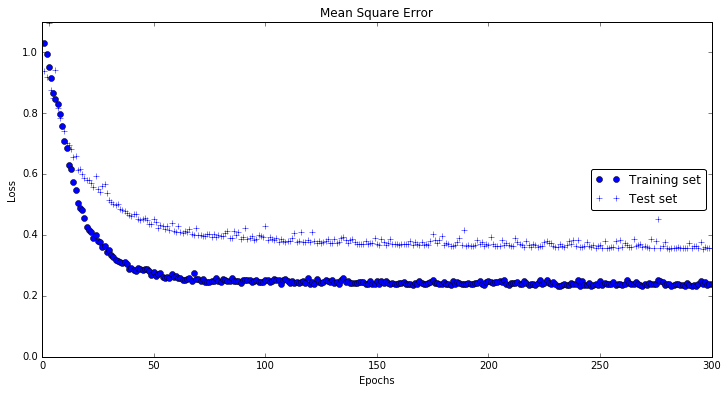

In [4]:
history_dict = hist.history

import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12,6))
plt.plot(epochs, loss_values, 'bo', label = "Training set")
plt.plot(epochs, val_loss_values, 'b+', label = "Test set")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="center right", fancybox= True)
plt.title("Mean Square Error")
plt.ylim(0)

plt.show()

En este gráfico se puede ver como se comporta el error de entrenamiento y de pruebas (*MSE*), teniendo un declive bastante fuerte en las primeras repeticiones, disminuyendo su error desde un 100% hasta un 30% en las 50 repeticiones (*epoch*), donde se puede ver que el error ya no disminuye en gran medida, es decir, en este punto lo más probable es que se encuentre en un óptimo local, ya que el algoritmo de optimización se encuentra *estancado* en este error sin poder disminuirlo, por lo que el algoritmo convergue a las 50 *epoch* aproximadamente.  

En este gráfico tambien se aprecia el fenómeno de *overfitting* ya que el error de entrenamiento es mas bajo que el error de prueba y este no mejora al pasar las iteraciones sobre el algoritmo, por lo que se tiene este modelo ajustado sobre el conjunto de entrenamiento, menor error que el de pruebas. Por lo que la red neuronal no generaliza a la hora de predecir sobre un valor de prueba.  
Repitiendo el experimento se encontró que cambian algunos valores de errores pero se mantiene la misma tendencia del algoritmo, a converger a las 50 *epoch*.

### d) ReLu

In [5]:
def relu_3capas():
    model = Sequential()
    model.add(Dense(200, input_dim=X_train_scaled.shape[1], init='uniform'))
    model.add(Activation('relu'))

    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))
    return model

model = relu_3capas()
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

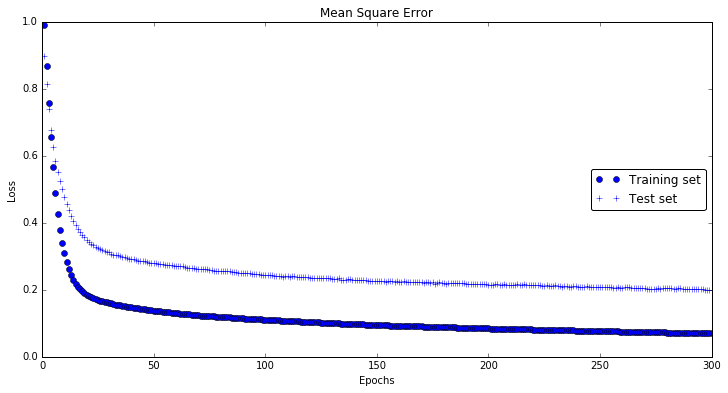

In [6]:
history_dict = hist.history

import matplotlib.pyplot as plt
%matplotlib inline
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(12,6))
plt.plot(epochs, loss_values, 'bo', label = "Training set")
plt.plot(epochs, val_loss_values, 'b+', label = "Test set")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="center right", fancybox= True)
plt.title("Mean Square Error")
plt.ylim(0)

plt.show()

En este gráfico se puede apreciar una rápida convergencia en los primeros epochs y a una estabilidad de los errores (MSE), esto se debe a que el tipo de problema es de regresión lineal, ya que el precio de la casa vive en un dominio continuo y es una combinación lineal de los atributos, al igual que la función de activación es lineal.

En el otro gráfico con la función de activación sigmoidal, tanto en el conjunto de entrenamiento y de test, por cada epoch hay una cota de incertidumbre en los errores en relación a la tendencia que estos siguen, es decir estos varían alrededor de la tendencia. No así en este gráfico, ya que los errores siguen una tendencia clara y casi continua por la naturaleza de la función de activación.

Empíricamente, se observan bajas notables en los errores.En el conjunto de entrenamiento en la 50 iteración de un 100% baja a un 15% en comparación al 30% de la sigmoidal. En el conjunto de prueba de un 100% pasó a 30% en comparación a un 40% con la función de activación sigmoidal. A pesar de la mejora, con esta función persiste el fenómeno de overfitting.  
Entonces, por convergencia, disminución de los errores y por la naturaleza del problema, la función de activación relu es más efectiva que la función de activación sigmoidal. 


### e) Variar *learning rate*

In [7]:
#funcion para graficar

def graficar_historial(hist1,hist2):
    history_dict1 = hist1.history
    history_dict2 = hist2.history
    
    loss_values1 = history_dict1['loss']
    val_loss_values1 = history_dict1['val_loss']
    epochs1 = range(1, len(loss_values1) + 1)
    
    loss_values2 = history_dict2['loss']
    val_loss_values2 = history_dict2['val_loss']
    epochs2 = range(1, len(loss_values2) + 1)


    f, axarr = plt.subplots(1, 2, figsize=(14,5) )
    colors = ['#0B9014','#D20BD2']*4
    axarr[0].plot(epochs1, loss_values1, 'bo', label = "Training set")
    axarr[0].plot(epochs1, val_loss_values1, 'b+', label = "Test set")
    axarr[0].set_title('Error de Arquitectura Sigmoidal')
    axarr[0].set_ylim(0)
    axarr[0].set_xlabel('Epochs')
    axarr[0].set_ylabel('Loss')
    axarr[0].legend(loc="center right", fancybox= True)

    axarr[1].plot(epochs2, loss_values2, 'bo', label = "Training set")
    axarr[1].plot(epochs2, val_loss_values2, 'b+', label = "Test set")
    axarr[1].set_title('Error de Arquitectura ReLu')
    axarr[1].set_ylim(0)
    axarr[1].set_xlabel('Epochs')
    axarr[1].set_ylabel('Loss')
    axarr[1].legend(loc="center right", fancybox= True)

    f.tight_layout() #separar los subplot
    plt.show()

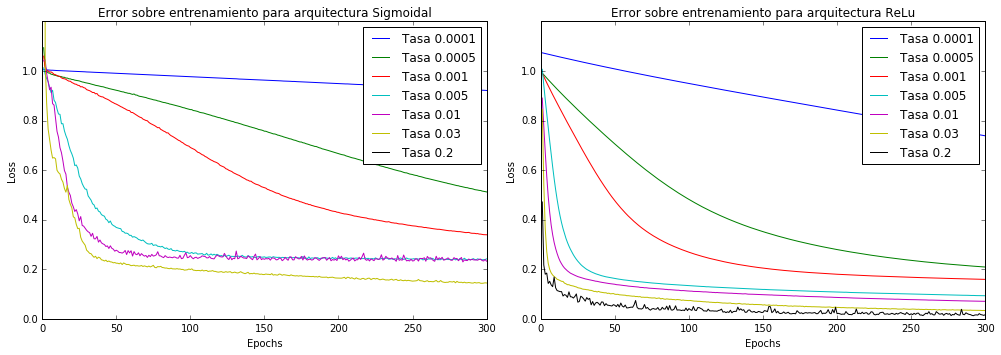

In [9]:
import numpy as np
n_lr = 20
lear_rate = np.linspace(0,1,n_lr)
lear_rate = [0.0001,0.0005,0.001,0.005, 0.01, 0.03, 0.2] #distintos valores de learning rate

f, axarr = plt.subplots(1, 2, figsize=(14,5) )
    
for learn in lear_rate:
    #Sigmoidal
    model = sigmoidal_3capas()
    sgd = SGD(lr=learn)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist1 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    axarr[0].plot(range(1,301),hist1.history['loss'], label = "Tasa "+str(learn))

    #Relu
    model = relu_3capas()
    sgd = SGD(lr=learn)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist2 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
    verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    axarr[1].plot(range(1,301),hist2.history['loss'], label = "Tasa "+str(learn))

axarr[0].legend(loc='upper right')
axarr[0].set_title('Error sobre entrenamiento para arquitectura Sigmoidal')
axarr[0].set_ylim(0,1.2)
axarr[0].set_xlabel('Epochs')
axarr[0].set_ylabel('Loss')
axarr[1].legend(loc='upper right')
axarr[1].set_title('Error sobre entrenamiento para arquitectura ReLu')
axarr[1].set_ylim(0,1.2)
axarr[1].set_xlabel('Epochs')
axarr[1].set_ylabel('Loss')
    
    #graficar_historial(hist1,hist2)
f.tight_layout() #separar los subplot
plt.show()

Los gráficos anteriores resumen el error sobre el conjunto en el cual se entrena la red neuronal para la arquitectura con Sigmoidal y con ReLu con distintos valores de tasa de aprendizaje. Estos gráficos muestran la gran sensibilidad del algoritmo optimizador en torno al hiperparámetro *learning rate*, esto se puede ver ya que con un valor bajo el algoritmo se demora mucho en converger y llegar a un óptimo local, como se puede apreciar en el gráfico la línea de color azul en 300 *epochs* no disminuye del 80% de error para **sigmoidal** y 60% para **relu**. Ya que la tasa de aprendizaje del algoritmo es baja, este explora el espacio de búsqueda muy lentamente en la dirección del gradiente, demorándose en encontrar algún óptimo.  
Con *learning rate* de 0.005 (línea celeste) se comporta mejor que con 0.001 (línea roja), ya que con este valor se acerca a un error bajo de una manera más rapida debido a que le entrega un mayor porcentaje a la intensidad del gradiente, por lo que encontrar el óptimo para este caso se hace mas fácil.  

Se puede ver que la arquitectura de ReLu se comporta mucho mejor sobre el problema que con la Sigmoidal, teniendo convergencias más rápidas con valores más bajos de *learning rate*, por lo que con "poco aprendizaje" ReLu logra alcanzar mejores valores de convergencia de entrenamiento.

En estos gráficos se puede apreciar que al ir aumentando la tasa de aprendizaje el algoritmo converge más rápido, llegando a un umbral donde la tasa de aprendizaje muy alta hace que el algoritmo de gradiente descendente estocástico diverga, como se puede apreciar en la siguiente línea de código.

In [201]:
print "Sigmoidal Learning rate = 0.05"
model = sigmoidal_3capas()
sgd = SGD(lr=0.05)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=4,
verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

print "ReLu Learning rate = 0.5"
model = relu_3capas()
sgd = SGD(lr=0.5)
model.compile(optimizer=sgd,loss='mean_squared_error')

hist = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=4,
verbose=1, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))

Sigmoidal Learning rate = 0.05
Train on 379 samples, validate on 127 samples
Epoch 1/4
379/379 [==============================] - 0s - loss: 35425307402.4632 - val_loss: 7573102698818.5195
Epoch 2/4
379/379 [==============================] - 0s - loss: 10914376267192147640320.0000 - val_loss: 1181398460945506544648192.0000
Epoch 3/4
379/379 [==============================] - 0s - loss: 1171013708572380679758127285927936.0000 - val_loss: 88434425792742180707161156731535360.0000
Epoch 4/4
379/379 [==============================] - 0s - loss: nan - val_loss: nan                           
ReLu Learning rate = 0.05
Train on 379 samples, validate on 127 samples
Epoch 1/4
379/379 [==============================] - 0s - loss: 4415084.2968 - val_loss: 1749733556954144641646592.0000
Epoch 2/4
379/379 [==============================] - 0s - loss: nan - val_loss: nan                
Epoch 3/4
379/379 [==============================] - 0s - loss: nan - val_loss: nan
Epoch 4/4
379/379 [============

Se puede ver que con 4 *epochs* el algoritmo ya diverge, con distintas tasas de aprendizaje para las distintas arquitecturas, teniendo valores de función de pérdida bastante altos en aumento. Con esto se tiene que el umbral de la tasa de aprendizaje para sigmoidal es de 0.05 y para la arquitectura con relu es de 0.5.  
Con este análisis se concluye que la tasa de aprendizaje debe ser baja para obtener un resultado óptimo, con la posibilidad de que si es muy baja el algoritmo se tardará mucho en obtener un resultado óptimo. Con valores altos de tasa de aprendizaje la aleatoridad juega un papel más importante.

## f) Validación cruzada

In [29]:
from sklearn.model_selection import KFold
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()


def C_V(Xm,ym,K, tipo):
    kfold = KFold(K)
    cvscores = []
    for i, (train, val) in enumerate(kfold.split(Xm)):
        # create model
        if tipo == "relu":
            model = relu_3capas()
            sgd = SGD(lr=0.2)
        elif tipo == "sigmoidal":
            model = sigmoidal_3capas()
            sgd = SGD(lr=0.01)
            
        # Compile model
        model.compile(optimizer=sgd,loss='mean_squared_error')
        # Fit the model
        model.fit(Xm[train], ym[train], nb_epoch=300, verbose=0)
        # evaluate the model
        scores = model.evaluate(Xm[val], ym[val])
        cvscores.append(scores)
    mse_cv = np.mean(cvscores)
    return mse_cv

print "\nEstimacion del error con 5 folds (arquitectura Sigmoidal) %f"%C_V(Xm,ym,5,"sigmoidal")
print "\nEstimacion del error con 5 folds (arquitectura ReLu) %f"%C_V(Xm,ym,5,"relu")

print "\nEstimacion del error con 10 folds (arquitectura Sigmoidal) %f"%C_V(Xm,ym,10,"sigmoidal")
print "\nEstimacion del error con 10 folds (arquitectura ReLu) %f"%C_V(Xm,ym,10,"relu")

32/75 [===========>..................] - ETA: 0s
Estimacion del error con 5 folds (arquitectura Sigmoidal) 0.287523
32/75 [===========>..................] - ETA: 0s
Estimacion del error con 5 folds (arquitectura ReLu) 0.138879
32/37 [========================>.....] - ETA: 0s
Estimacion del error con 10 folds (arquitectura Sigmoidal) 0.272656
32/37 [========================>.....] - ETA: 0s
Estimacion del error con 10 folds (arquitectura ReLu) 0.115438


En la celda anterior se presentan los errores de validación con 5 folds y con 10 folds, para las arquitectura de 3 capas de Sigmoidal con una tasa de aprendizaje de 0.01 y para ReLu con una tasa de aprendizaje de 0.2. A continuación se presenta el error real sobre el conjunto de pruebas.

In [10]:
model = sigmoidal_3capas()
            
# Compile model
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba (arquitectura Sigmoidal) %f"%model.evaluate(X_test_scaled.as_matrix(), y_test_scaled.as_matrix())
        
model = relu_3capas()

# Compile model
sgd = SGD(lr=0.2)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba (arquitectura ReLu) %f"%model.evaluate(X_test_scaled.as_matrix(), y_test_scaled.as_matrix())

 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura Sigmoidal) 0.356387
 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura ReLu) 0.181270


Se puede ver en este caso que, para las dos arquitecturas de redes neuronales creadas, el error sobre el conjunto de pruebas (*error real*) es mayor que la estimación del error realizada por *cross validation* para los distintos números de fold (5 y 10), es decir, los valores de la estimación por *cross validation* nos dicen que el modelo posee un menor error del que verdaderamente posee, por lo que sobreestima el comportamiento del modelo sobre la data futura.  
Para el caso de probar una validación cruzada con 10 folds el tiempo de ejecución es mayor que para 5 folds, esto es ya que son 10 modelos los que se deben ajustar y predecir los errores, comparado con 5 modelos de la validación con 5 folds. Aunque la validación con 10 folds se acerca más al valor real del error, cabe decir que como el algoritmo optimizador es estocástico los valores pueden ir cambiando si se repite el experimento, pero el comportamiento que más se repite es el descrito anteriormente. 

### g) *progressive decay*

Para learning rate inicial de 0.02 para Sigmoidal y 0.2 para ReLu


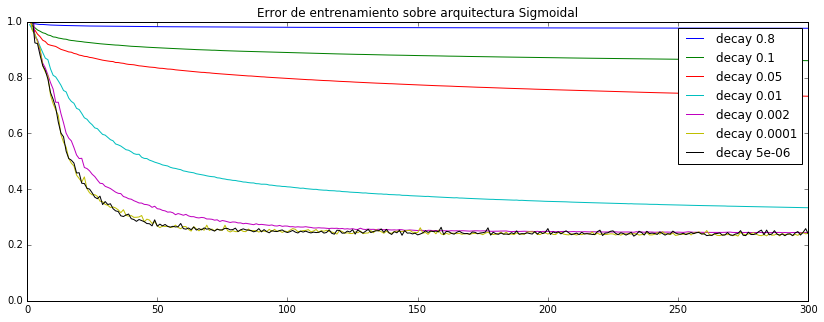

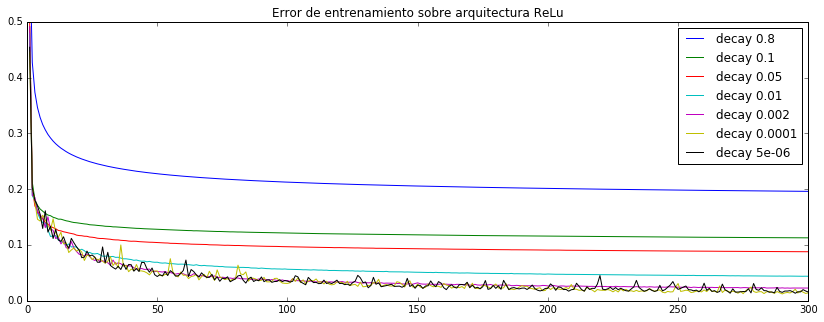

In [12]:
n_decay = 10
lear_decay = np.logspace(-6,0,n_decay)

lear_decay =[0.8,0.1,0.05,0.01,0.002,0.0001,0.000005]

print "Para learning rate inicial de 0.02 para Sigmoidal y 0.2 para ReLu"

plt.figure(figsize=(14,5))
for i in lear_decay:
        
    model = sigmoidal_3capas()
    sgd = SGD(lr=0.01, decay=i)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist1 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    plt.plot(range(1,301),hist1.history['loss'], label = "decay "+str(i))

plt.ylim(0,1)
plt.title('Error de entrenamiento sobre arquitectura Sigmoidal')
plt.legend()
plt.show()

plt.clf()
plt.figure(figsize=(14,5))
for i in lear_decay:
    model = relu_3capas()
    sgd = SGD(lr=0.2, decay=i)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist2 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    plt.plot(range(1,301),hist2.history['loss'], label = "decay "+str(i))
plt.ylim(0,0.5)
plt.title('Error de entrenamiento sobre arquitectura ReLu')
plt.legend()
plt.show()

En los gráficos anteriores se presentan errores para las arquitecturas estudiadas anteriormente (Sigmoidal y ReLu) sobre el conjunto de entrenamiento, mostrándo distintas líneas que representan a distintos valores del hiperparámetro *progressive decay* del algoritmo optimizador. Este hiperparámetro afecta a la tasa de aprendizaje ya que la decae en cada iteración de una manera progresiva buscando el valor óptimo.  
Se puede ver que el comportamiento de cómo afecta a las dos arquitecturas es la misma, donde con valores pequeños de *progressive decay* no afectan en gran medida a la tasa de aprendizaje ya que la decaen en un valor muy pequeño por lo que no se nota. Por otro lado, al ir aumentando el hiperparámetro las curvas se desplazan, lo que significa que aumenta el error y ralentiza la convergencia. Esto es ya que al tener un valor muy alto del hiperparámetro la tasa de aprendizaje decaerá muy rápidamente a un valor pequeño (aproximadamente 0), por lo que impedirá que la máquina aprenda lo necesario del conjunto de entrenamiento.  

Comparando las dos arquitecturas mostradas en los dos gráficos anteriores se puede ver que la arquitectura con función de activación Sigmoidal es mucho más sensible que la con ReLu a este hiperparámetro que afecta el aprendizaje. Este comportamiento también fue presente al variar la tasa de aprendizaje anteriormente, por lo que muestra que para este problema la función de activación ReLu es mucho mas robusta al aprendizaje.

### h) momentum

Para learning rate inicial 0.2 para Relu y 0.01 para Sigmoidal
momentum de la iteracion = 0.000000


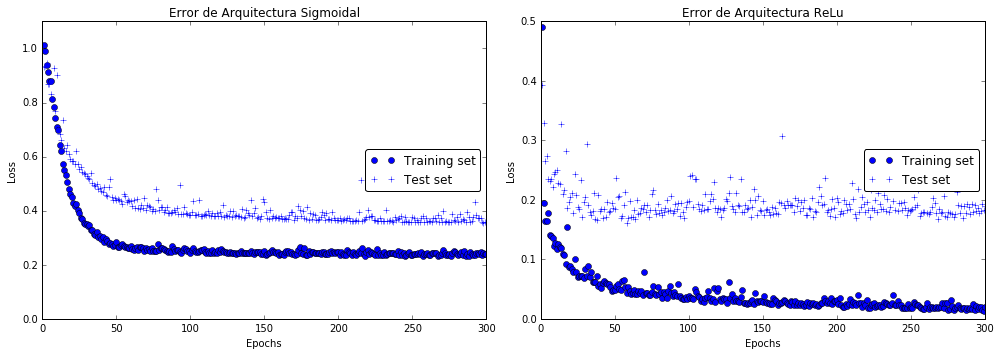

momentum de la iteracion = 0.050000


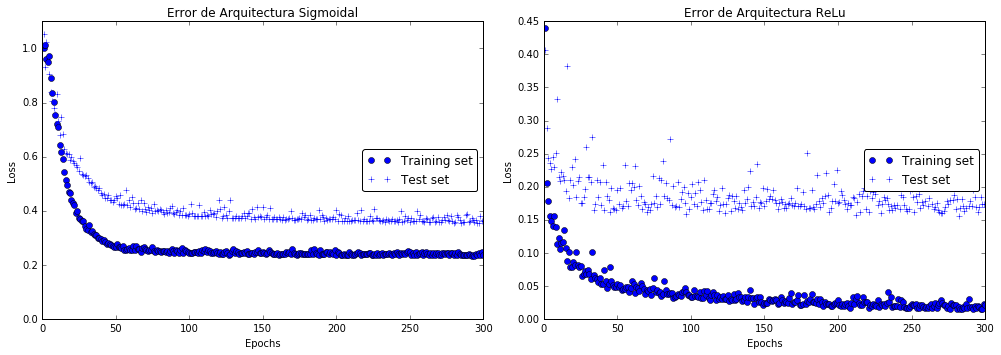

momentum de la iteracion = 0.100000


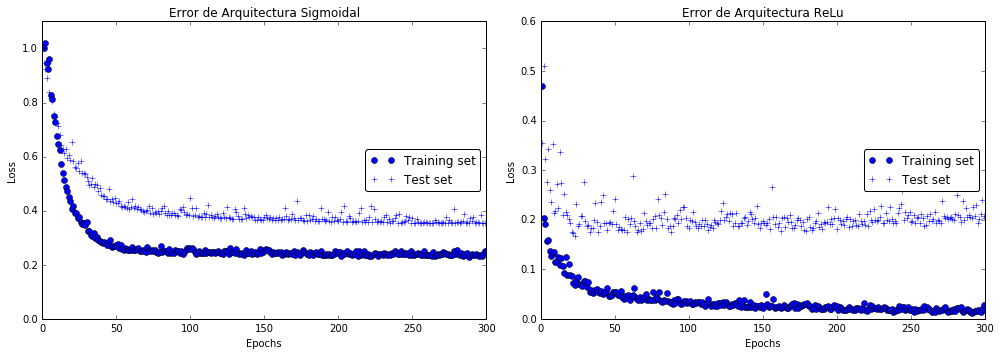

momentum de la iteracion = 0.150000


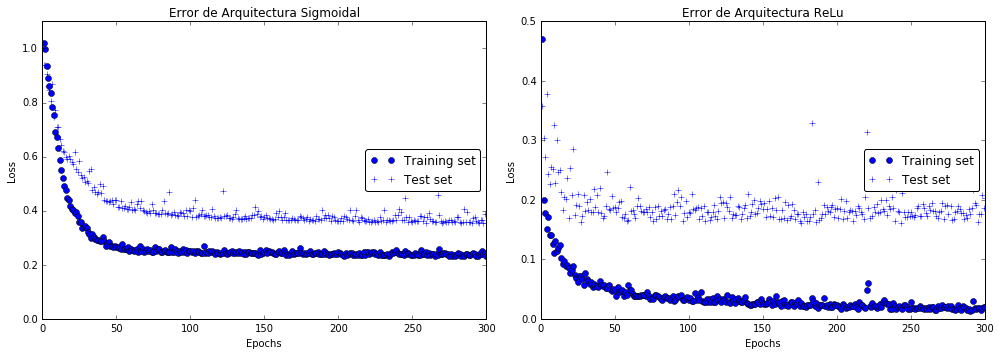

momentum de la iteracion = 0.200000


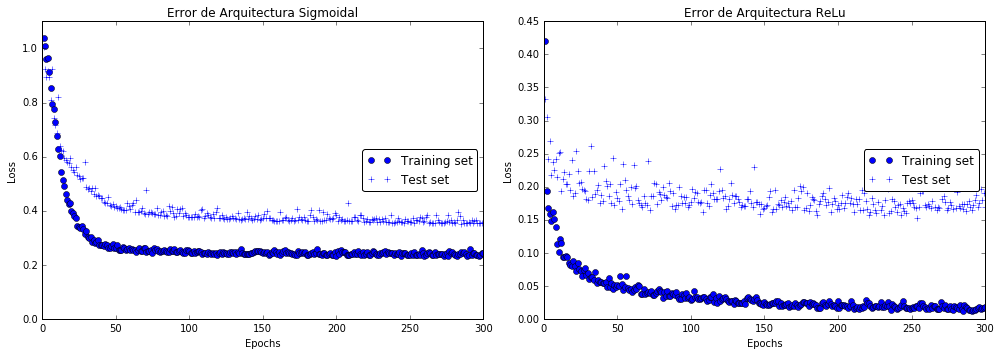

momentum de la iteracion = 0.250000


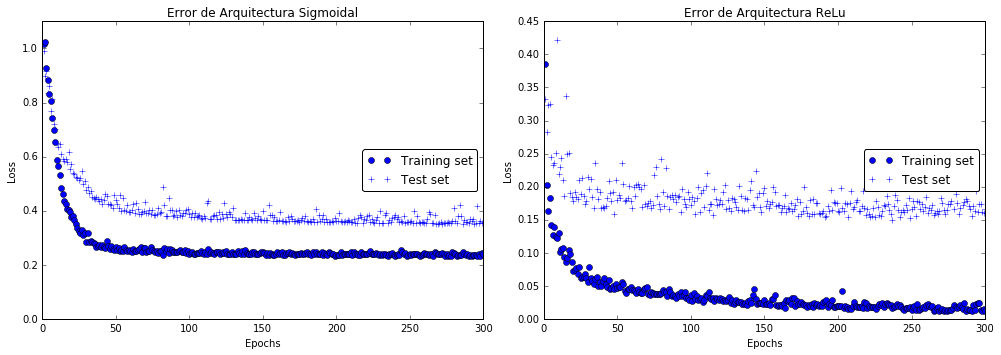

momentum de la iteracion = 0.300000


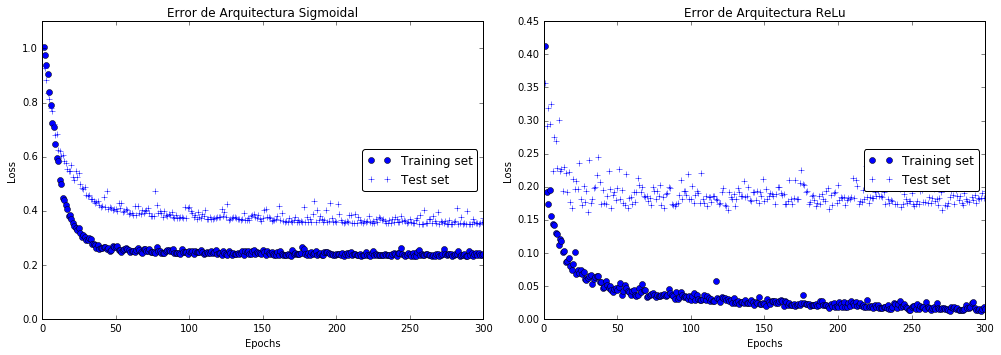

momentum de la iteracion = 0.350000


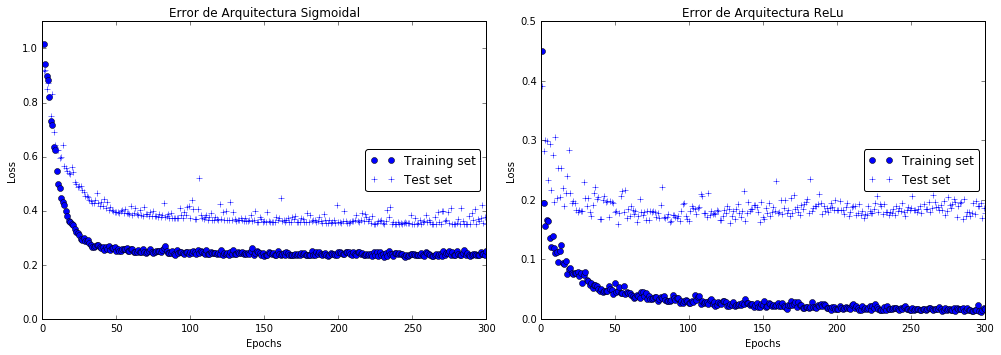

momentum de la iteracion = 0.400000


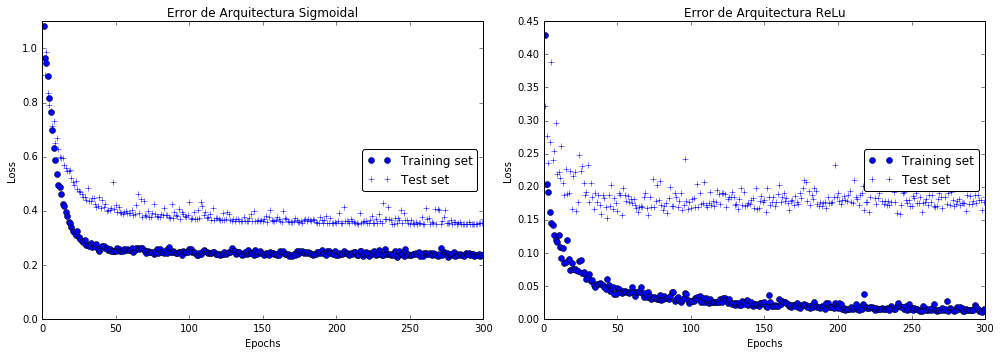

momentum de la iteracion = 0.450000


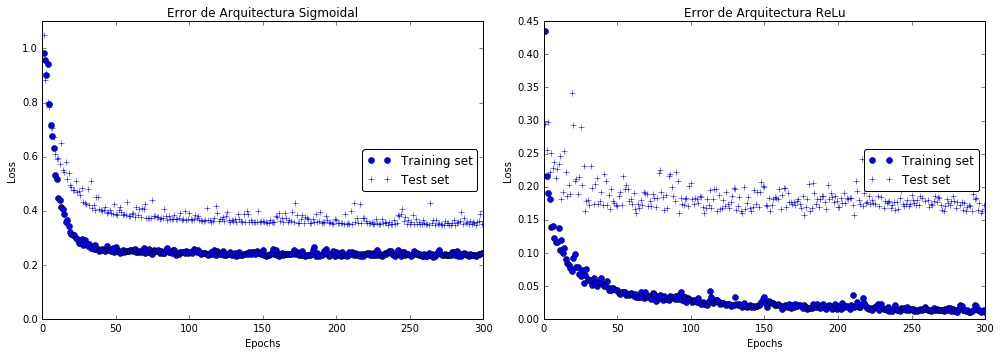

momentum de la iteracion = 0.500000


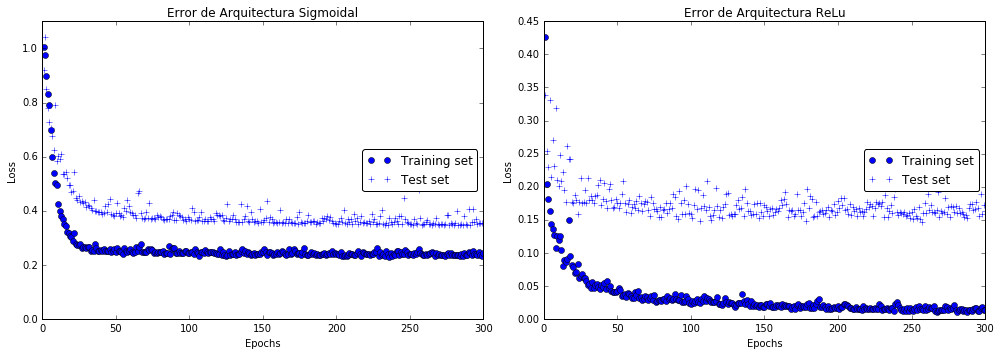

momentum de la iteracion = 0.550000


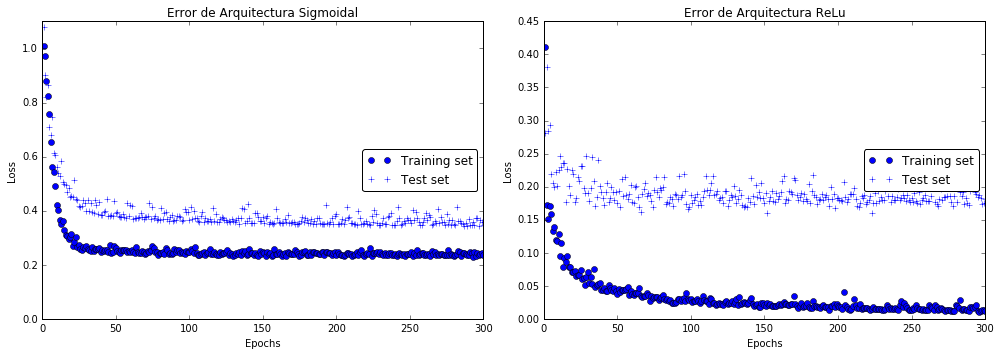

momentum de la iteracion = 0.600000


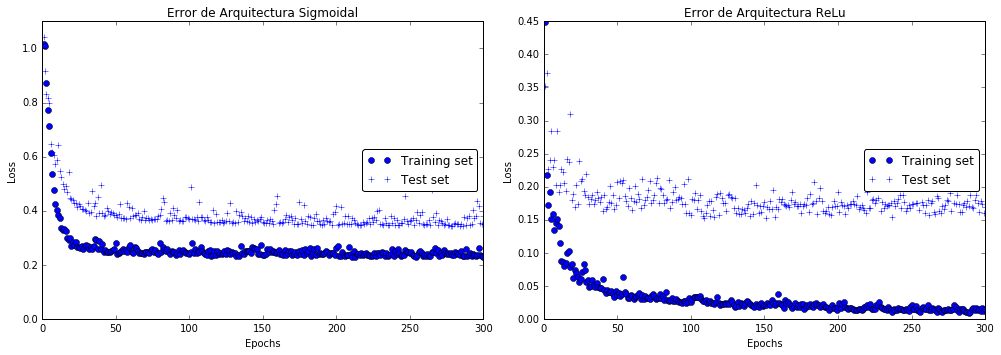

momentum de la iteracion = 0.650000


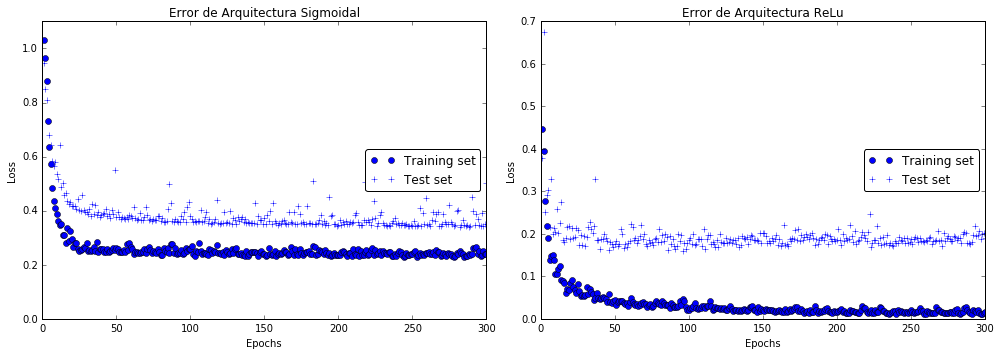

momentum de la iteracion = 0.700000


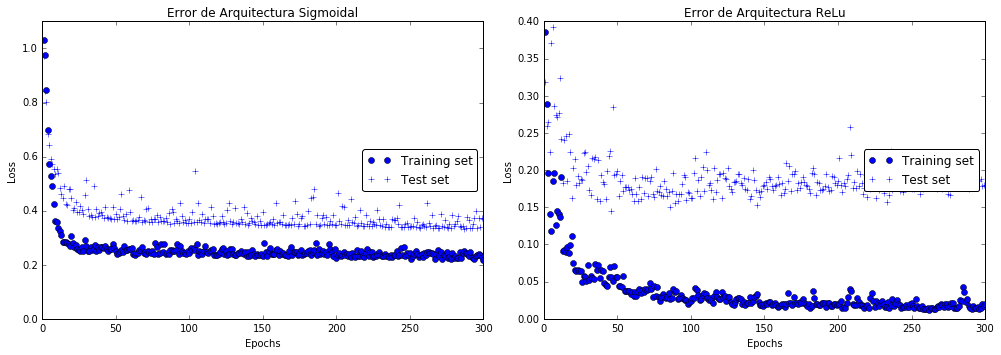

momentum de la iteracion = 0.750000


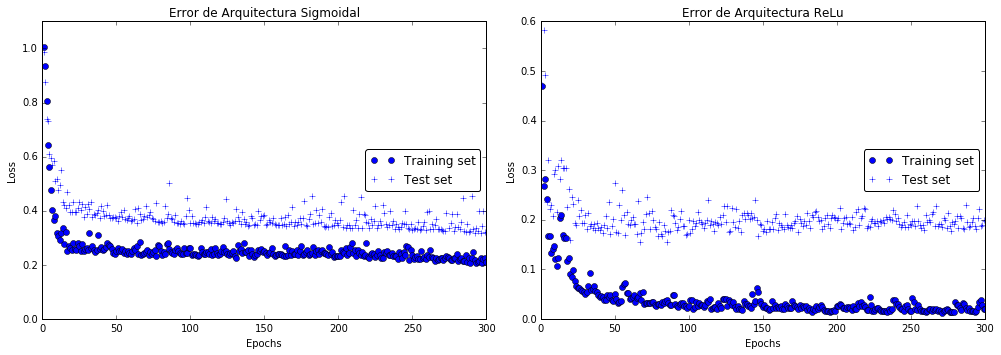

momentum de la iteracion = 0.800000


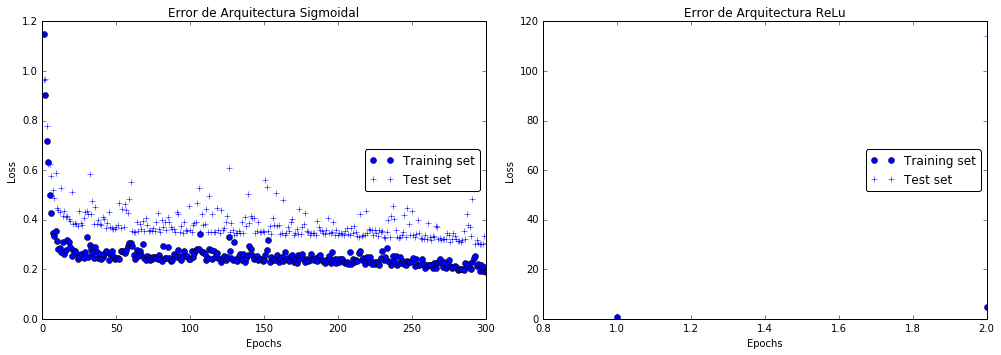

momentum de la iteracion = 0.850000


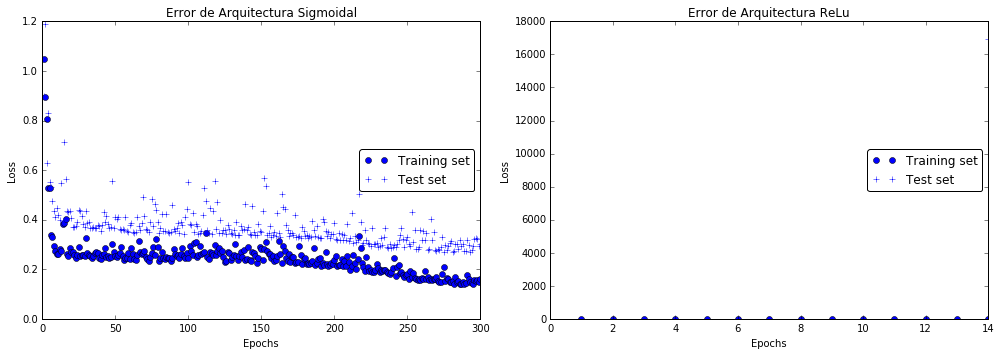

momentum de la iteracion = 0.900000


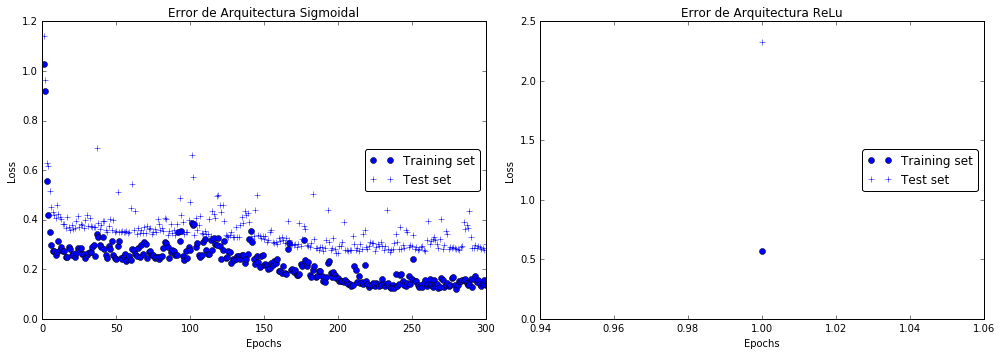

momentum de la iteracion = 0.950000


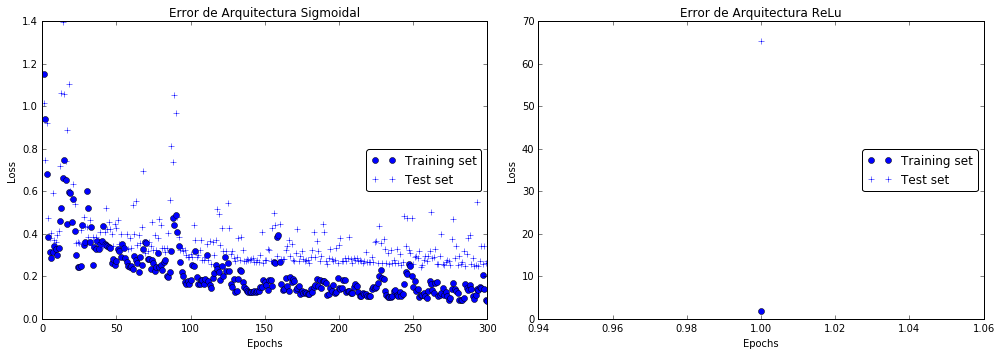

momentum de la iteracion = 1.000000


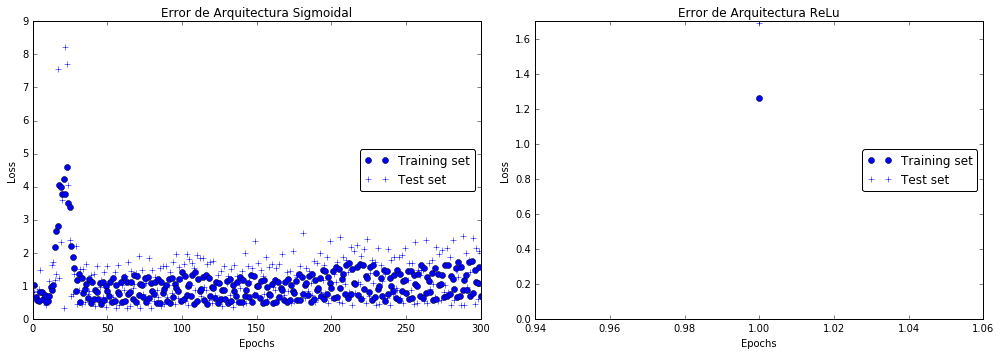

In [216]:
n_decay = 21
momentum = np.linspace(0,1,n_decay)

print "Para learning rate inicial 0.2 para Relu y 0.01 para Sigmoidal"
for i in momentum:
    
    print "momentum de la iteracion = %f"%i
    
    model = sigmoidal_3capas()
    sgd = SGD(lr=0.01,momentum=i)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist1 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    model = relu_3capas()
    sgd = SGD(lr=0.2, momentum=i)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist2 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    graficar_historial(hist1,hist2)

### momentum Nesterov

Para learning rate inicial 0.2 para Relu y 0.01 para Sigmoidal
momentum de la iteracion = 0.000000


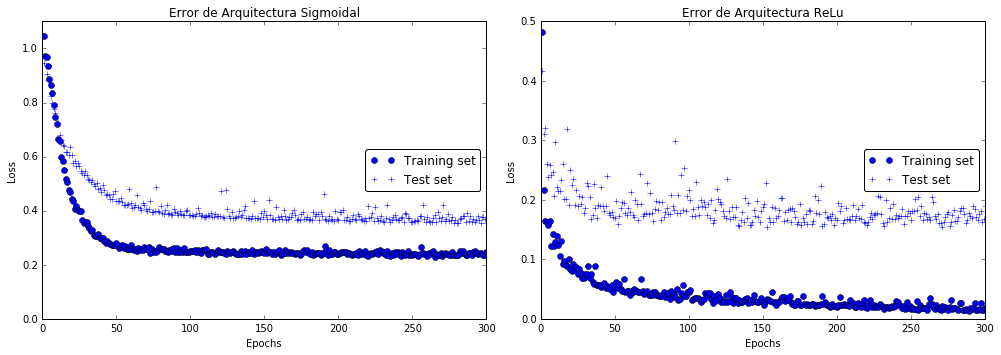

momentum de la iteracion = 0.111111


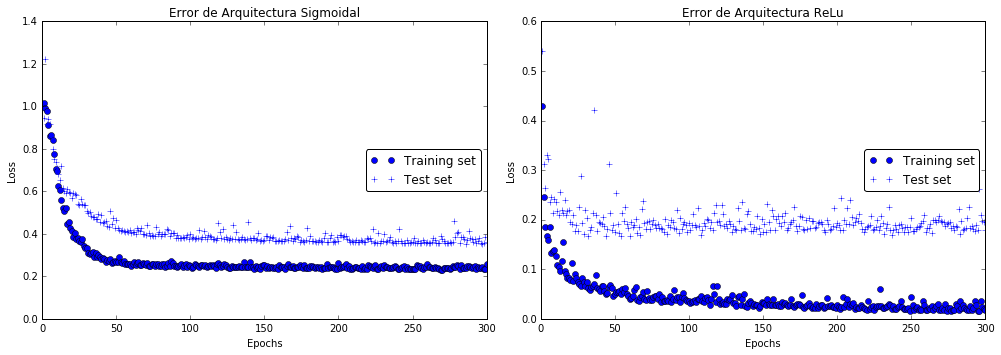

momentum de la iteracion = 0.222222


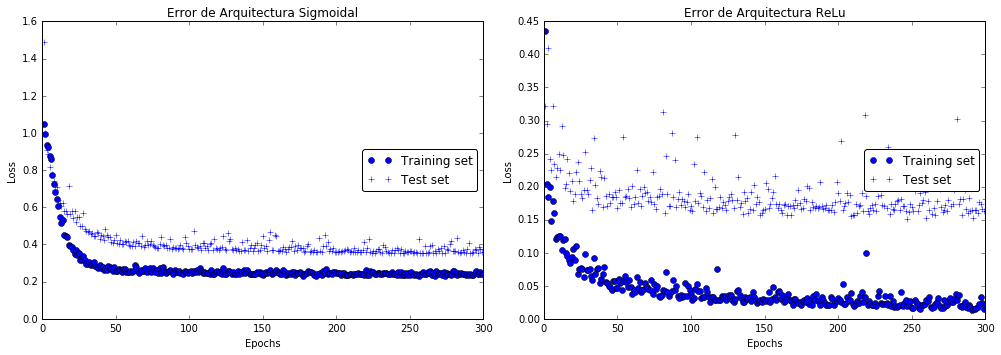

momentum de la iteracion = 0.333333


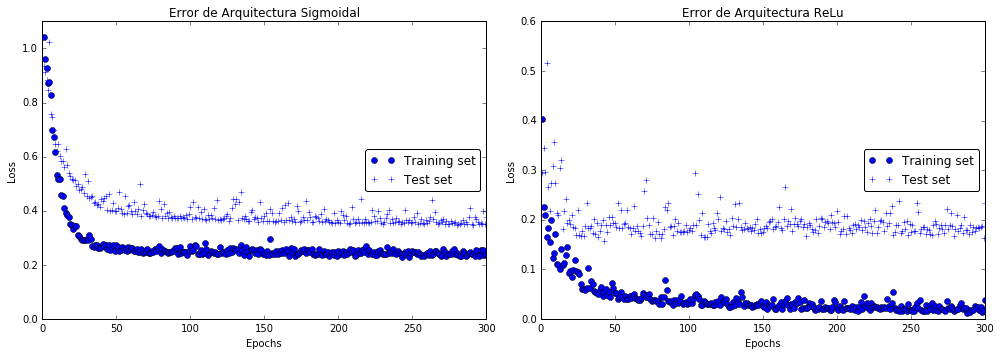

momentum de la iteracion = 0.444444


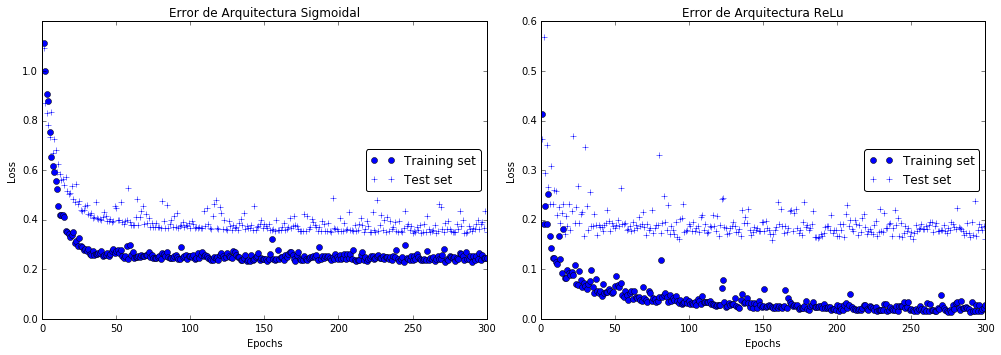

momentum de la iteracion = 0.555556


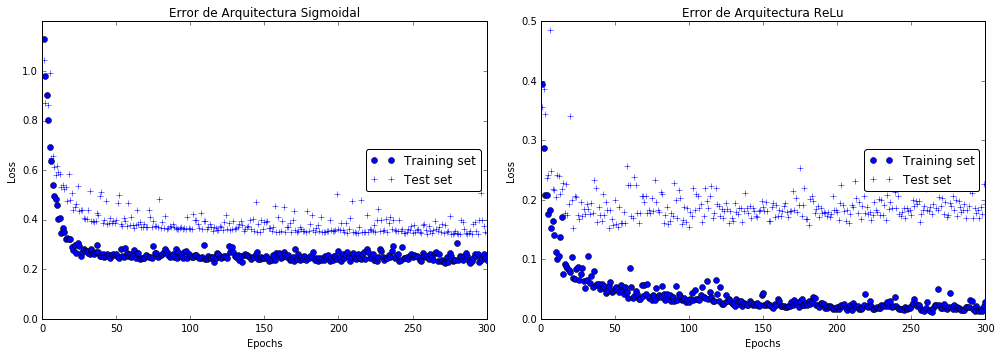

momentum de la iteracion = 0.666667


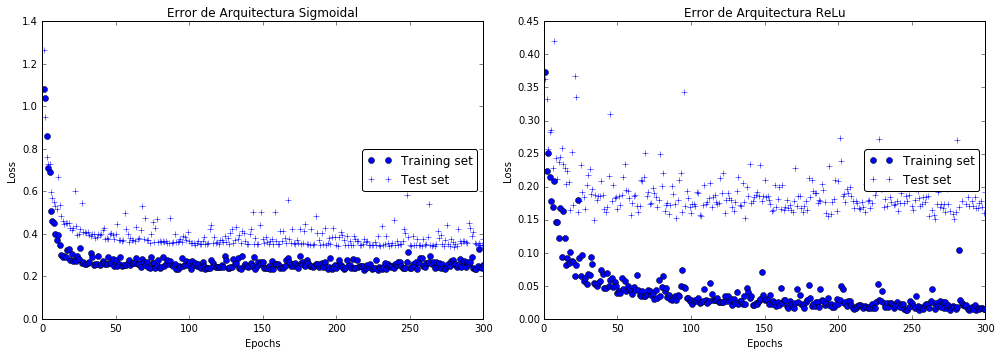

momentum de la iteracion = 0.777778


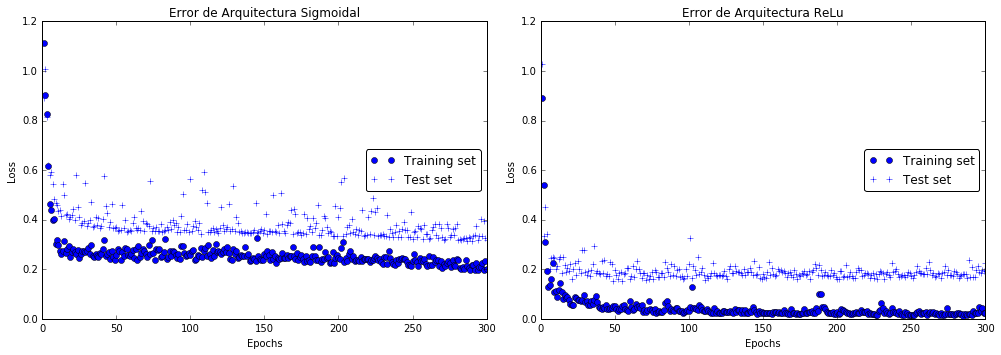

momentum de la iteracion = 0.888889


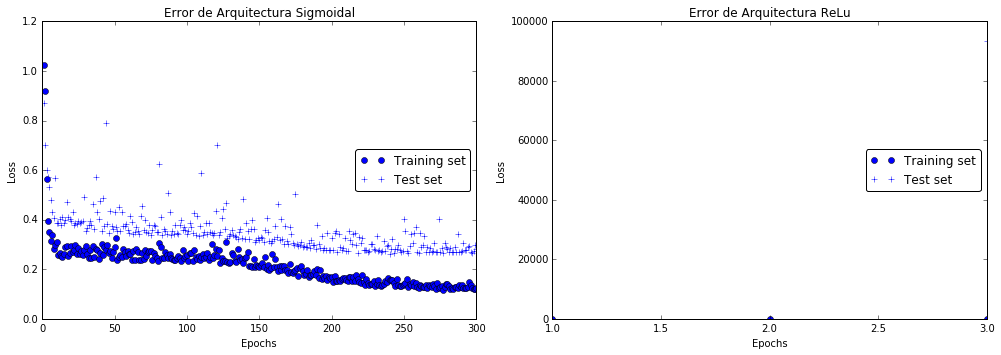

momentum de la iteracion = 1.000000


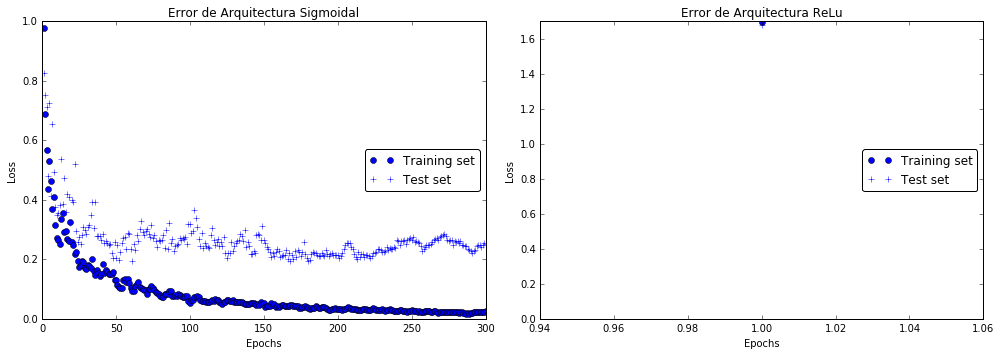

In [221]:
n_decay = 10
momentum = np.linspace(0,1,n_decay)

print "Para learning rate inicial 0.2 para Relu y 0.01 para Sigmoidal"
for i in momentum:
    
    print "momentum de la iteracion = %f"%i
    
    model = sigmoidal_3capas()
    sgd = SGD(lr=0.01,momentum=i,nesterov=True)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist1 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    model = relu_3capas()
    sgd = SGD(lr=0.2, momentum=i,nesterov=True)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist2 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
        verbose=0, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    graficar_historial(hist1,hist2)

analisis...

### i) Mini Batches

Para learning rate 0.01
batch size = 379
batch size = 200
batch size = 150
batch size = 100
batch size = 70
batch size = 30
batch size = 10


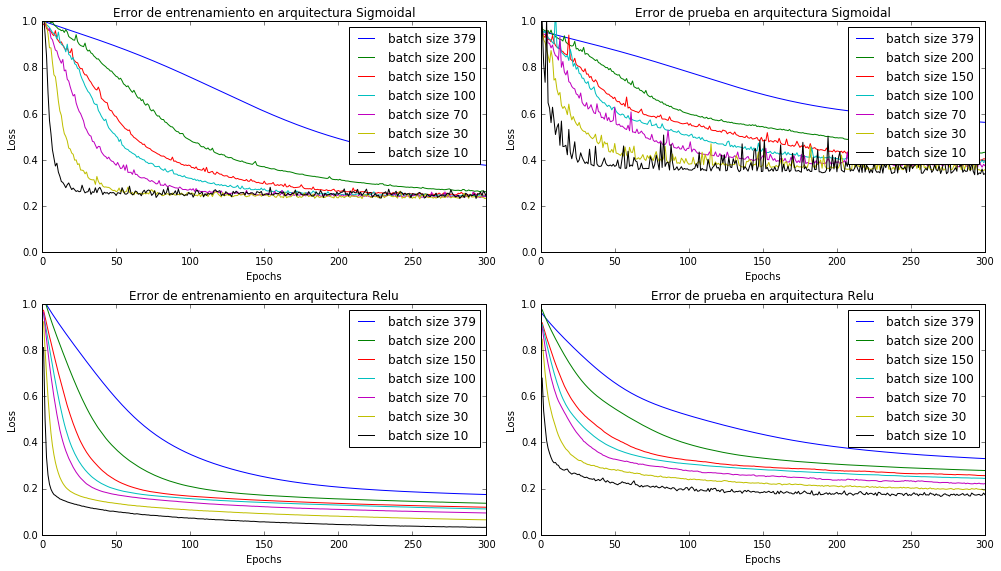

In [13]:
#casos representativos
batch_sizes = [379,200,150,100,70,30,10]

f, axarr = plt.subplots(2, 2, figsize=(14,8) )

print "Para learning rate 0.01"
for i in batch_sizes:
    print "batch size = %d"%i
    
    #Sigmoidal
    model = sigmoidal_3capas()
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist1 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
        verbose=0, batch_size = i,  validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    #grafico
    axarr[0,0].plot(range(1,301),hist1.history['loss'],label= "batch size "+str(i))
    axarr[0,0].set_title('Error de entrenamiento en arquitectura Sigmoidal')
    
    axarr[0,1].plot(range(1,301),hist1.history['val_loss'],label= "batch size "+str(i))
    axarr[0,1].set_title('Error de prueba en arquitectura Sigmoidal')
    
    #Relu
    model = relu_3capas()
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')

    hist2 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300,
        verbose=0, batch_size = i,  validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    
    #grafico
    axarr[1,0].plot(range(1,301),hist2.history['loss'],label= "batch size "+str(i))
    axarr[1,0].set_title('Error de entrenamiento en arquitectura Relu')
    
    axarr[1,1].plot(range(1,301),hist2.history['val_loss'],label= "batch size "+str(i))
    axarr[1,1].set_title('Error de prueba en arquitectura Relu')    
    
    #configuraciones de cada subplot
    for j in range(2):
        for k in range(2):
            axarr[j,k].set_ylim(0,1)
            axarr[j,k].set_xlabel('Epochs')
            axarr[j,k].set_ylabel('Loss')
            axarr[j,k].legend()
        
f.tight_layout() #separar los subplot
plt.show()

Los gráficos anteriores resumen los errores de entrenamiento sobre las dos arquitecturas anteriormente estudiadas, donde para este caso a ambos optimizadores se les asignó tasa de aprendizaje 0.01 para que estén en las *mismas condiciones* para comparar cómo afecta el tamaño del **batch size**. Estos gráficos presentan variaciones de los tamaños de los *batch* (muestras) mostrándo como afectan al error de entrenamiento y de pruebas. Los dos primeros gráficos son para la función de activación Sigmoidal y los dos inferiores para la función de activación ReLu.  
En estos gráficos se puede ver el comportamiento similar de que con un tamaño del *batch* más pequeño el error es menor y la convergencia es más rápida. Esto ocurre ya que al tomar una muestra pequeña del dataset se tenderá a generalizar más y obtener modelos no tan complejos y específicos, ya que esto se puede ver reflejado en que el error sobre el conjunto de pruebas también se ve disminuido (sin que el algoritmo lo sepa) con tamaños del *batch* pequeños.  

El caso extremo en que la muestra (*batch*) es todo el dataset se tiene una convergencia bastante lenta, ya que al tomar todos los datos el algoritmo debe explorar el espacio de búsqueda sesgado por todos esos datos, ya que el gradiente será en la dirección de la tendencia de todos los datos, lo cual harán que el modelo se demore más en llegar a un óptimo comparado que si se toma un subconjunto pequeño de los datos, hará que el modelo explore más el espacio de búsqueda teniendo una convergencia más rapida.

### j) Optimizadores modernos

In [16]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta

optimizadores = [SGD(lr=0.01),Adam(lr=0.01),RMSprop(lr=0.01),Adagrad(lr=0.01),Adadelta(lr=0.01)]
#optimizadores = [SGD(lr=0.01),Adam(),RMSprop(),Adagrad(),Adadelta()]
nombres = ["SGD", "Adam", "RMSprop","Adagrad","Adadelta"]

historiales1 = []
historiales2 = []
for opti,nombre in zip(optimizadores,nombres):
    print "Optimizador "+nombre+"... ",
    moptimizer = opti
    
    #Sigmoidal
    model = sigmoidal_3capas()
    model.compile(optimizer=moptimizer,loss='mean_squared_error')

    hist1 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), verbose =0,nb_epoch=300, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    historiales1.append(hist1)
    
    #ReLu
    model = relu_3capas()
    model.compile(optimizer=moptimizer,loss='mean_squared_error')

    hist2 = model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(),verbose=0, nb_epoch=300, validation_data=(X_test_scaled.as_matrix(), y_test_scaled.as_matrix()))
    historiales2.append(hist2)
    print "terminado"

Optimizador SGD...  terminado
Optimizador Adam...  terminado
Optimizador RMSprop...  terminado
Optimizador Adagrad...  terminado
Optimizador Adadelta...  terminado


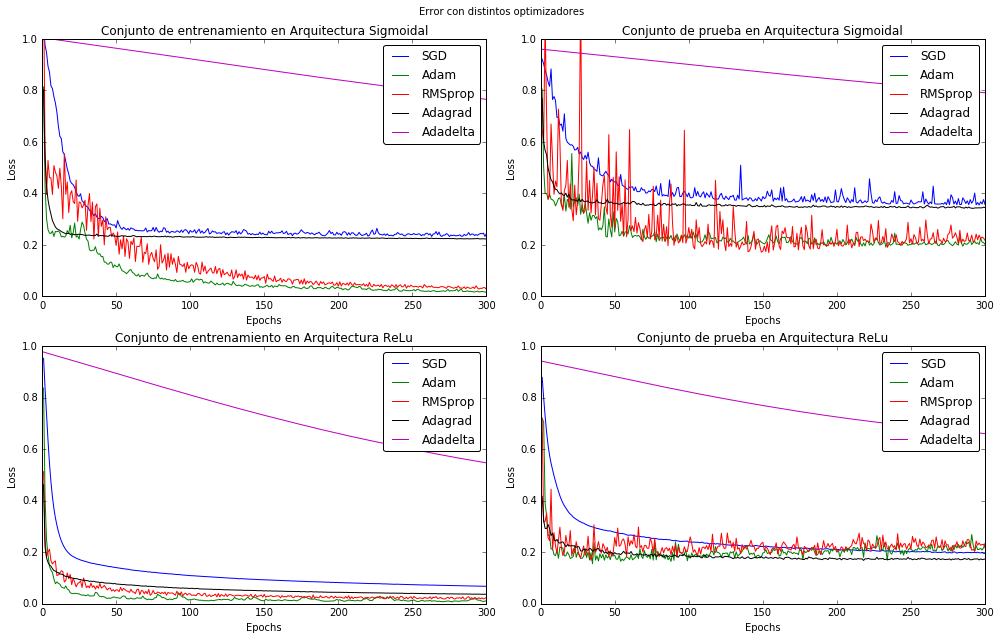

In [17]:
#para graficar
import matplotlib.pyplot as plt
loss_values1 = [hist.history['loss'] for hist in historiales1]
test_loss_values1 = [hist.history['val_loss'] for hist in historiales1]
epochs1 = range(1, len(loss_values1[0]) + 1)
    
loss_values2 = [hist.history['loss'] for hist in historiales2]
test_loss_values2 = [hist.history['val_loss'] for hist in historiales2]
epochs2 = range(1, len(loss_values2[0]) + 1)

f, axarr = plt.subplots(2, 2, figsize=(14,9) )
axarr[0,0].plot(epochs1, loss_values1[0], 'b', label = "SGD")
axarr[0,0].plot(epochs1, loss_values1[1], 'g', label = "Adam")
axarr[0,0].plot(epochs1, loss_values1[2], 'r', label = "RMSprop")
axarr[0,0].plot(epochs1, loss_values1[3], 'k', label = "Adagrad")
axarr[0,0].plot(epochs1, loss_values1[4], 'm', label = "Adadelta")
axarr[0,0].set_title('Conjunto de entrenamiento en Arquitectura Sigmoidal')

axarr[0,1].plot(epochs1, test_loss_values1[0], 'b', label = "SGD")
axarr[0,1].plot(epochs1, test_loss_values1[1], 'g', label = "Adam")
axarr[0,1].plot(epochs1, test_loss_values1[2], 'r', label = "RMSprop")
axarr[0,1].plot(epochs1, test_loss_values1[3], 'k', label = "Adagrad")
axarr[0,1].plot(epochs1, test_loss_values1[4], 'm', label = "Adadelta")
axarr[0,1].set_title('Conjunto de prueba en Arquitectura Sigmoidal')


axarr[1,0].plot(epochs1, loss_values2[0], 'b', label = "SGD")
axarr[1,0].plot(epochs1, loss_values2[1], 'g', label = "Adam")
axarr[1,0].plot(epochs1, loss_values2[2], 'r', label = "RMSprop")
axarr[1,0].plot(epochs1, loss_values2[3], 'k', label = "Adagrad")
axarr[1,0].plot(epochs1, loss_values2[4], 'm', label = "Adadelta")
axarr[1,0].set_title('Conjunto de entrenamiento en Arquitectura ReLu')

axarr[1,1].plot(epochs1, test_loss_values2[0], 'b', label = "SGD")
axarr[1,1].plot(epochs1, test_loss_values2[1], 'g', label = "Adam")
axarr[1,1].plot(epochs1, test_loss_values2[2], 'r', label = "RMSprop")
axarr[1,1].plot(epochs1, test_loss_values2[3], 'k', label = "Adagrad")
axarr[1,1].plot(epochs1, test_loss_values2[4], 'm', label = "Adadelta")
axarr[1,1].set_title('Conjunto de prueba en Arquitectura ReLu')

#configurar cada subplot
for i in range(2):
    for j in range(2):
        axarr[i,j].set_ylim(0,1)
        axarr[i,j].set_xlabel('Epochs')
        axarr[i,j].set_ylabel('Loss')
        axarr[i,j].legend(loc="upper right", fancybox= True)

f.tight_layout() #separar los subplot
f.suptitle('Error con distintos optimizadores')
f.subplots_adjust(top=0.93)
plt.show()

En los gráficos anteriores se presentan errores de distintos optimizadores modernos en las arquitecturas anteriormente vistas, donde todos estan en las *mismas condiciones* ya que tienen el mismo valor de tasa de aprendizaje, esto se dejó así para que los optimizadores no tengan preferencias sobre otros, debido a que sus configuraciones óptimas son otras, pero al dejar este parámetro se puede comparar mejor estos algoritmos.  
En primer lugar el algoritmo de Adadelta no se comporta bien con la tasa de aprendizaje ajustada, teniendo un proceso lento de convergencia y el mayor error de todos los algoritmos, por otro lado el algoritmo que mas oscila es el RMSprop, teniendo variaciones bastante altas en su error con el parámetro de tasa de aprenizaje ajustado,por lo que lo hace el menos confiable para este caso. El algoritmo anteriormente usado SGD (gradiente estocástico descendente) es el que tiene un mayor error de los otros, por lo que los otros algoritmos los cuales utilizan técnicas más novedosas funcionan mejor que el algoritmo típicamente usado.  
En los gráficos superiores (arquitectura con Sigmoidal) se puede ver el algoritmo Adagrad logra encontrar un óptimo local bastante rápido, lo cual hace que se estanque y no disminuya de ese error encontrado, posiblemente a que la tasa de aprendizaje es bastante baja por lo que la intensidad con la que explora el espacio de búsqueda es muy baja.  
Para los 4 gráficos se aprecia que el algoritmo que mejor se comporta es el Adam, el cual utiliza una técnica para adaptar el momentum y encontrar óptimos mejores que el resto, es decir, errores más bajos.

### k) Regularizador (*weight decay*)

In [107]:
print "Valores sin regularizar"
model = sigmoidal_3capas()
            
# Compile model
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba (arquitectura Sigmoidal) %f"%model.evaluate(X_test_scaled.as_matrix(), y_test_scaled.as_matrix())
        
model = relu_3capas()

# Compile model
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba (arquitectura ReLu) %f"%model.evaluate(X_test_scaled.as_matrix(), y_test_scaled.as_matrix())

Valores sin regularizar
 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura Sigmoidal) 0.357672
 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura ReLu) 0.195694


In [108]:
from keras.regularizers import *
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]

print "Para la arquitectura con sigmoidal"
model = Sequential()
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba con regularizador l2 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

print "\nPara la arquitectura con relu"
model = Sequential()
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba con regularizador l2 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

Para la arquitectura con sigmoidal
 32/127 [======>.......................] - ETA: 0s
Error de prueba con regularizador l2 = 0.369348

Para la arquitectura con relu
 32/127 [======>.......................] - ETA: 0s
Error de prueba con regularizador l2 = 0.217053


In [111]:
print "Para la arquitectura con sigmoidal"
model = Sequential()
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=l1(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform',W_regularizer=l1(0.01)))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba con regularizador l1 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

print "\nPara la arquitectura con relu"
model = Sequential()
model.add(Dense(200,input_dim=idim,init='uniform',W_regularizer=l1(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, init='uniform',W_regularizer=l1(0.01)))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba con regularizador l1 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

Para la arquitectura con sigmoidal
 32/127 [======>.......................] - ETA: 0s
Error de prueba con regularizador l1 = 0.379695

Para la arquitectura con relu
 32/127 [======>.......................] - ETA: 0s
Error de prueba con regularizador l1 = 0.278119


comentar..

### Añadiendo una capa

In [119]:
from keras.regularizers import *
print "Valores sin regularizar"
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]

print "Para la arquitectura con sigmoidal"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform',activation = 'sigmoid'))
model.add(Dense(600,init='uniform',activation = 'sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

print "\nPara la arquitectura con relu"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform',activation = 'relu'))
model.add(Dense(600,init='uniform',activation = 'relu'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

Valores sin regularizar
Para la arquitectura con sigmoidal
 64/127 [==============>...............] - ETA: 0s
Error de prueba = 0.380432

Para la arquitectura con relu
 64/127 [==============>...............] - ETA: 0s
Error de prueba = 0.175902


#### L2

In [116]:
from keras.regularizers import *
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]

print "Para la arquitectura con sigmoidal"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(600,init='uniform', W_regularizer=l2(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba con regularizador l2 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

print "\nPara la arquitectura con relu"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(600, init='uniform', W_regularizer=l2(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, init='uniform',W_regularizer=l2(0.01)))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba con regularizador l2 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

Para la arquitectura con sigmoidal
127/127 [==============================] - 0s     

Error de prueba con regularizador l2 = 0.488911

Para la arquitectura con relu
 32/127 [======>.......................] - ETA: 0s
Error de prueba con regularizador l2 = 0.201850


##### L1

In [118]:
print "Para la arquitectura con sigmoidal"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform',W_regularizer=l1(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(600, init='uniform', W_regularizer=l1(0.01)))
model.add(Activation('sigmoid'))
model.add(Dense(1, init='uniform',W_regularizer=l1(0.01)))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError sobre Test set con regularizador l1 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

print "\nPara la arquitectura con relu"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform',W_regularizer=l1(0.01)))
model.add(Activation('relu'))
model.add(Dense(600, init='uniform', W_regularizer=l1(0.01)))
model.add(Activation('relu'))
model.add(Dense(1, init='uniform',W_regularizer=l1(0.01)))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError sobre Test set con regularizador l1 = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

Para la arquitectura con sigmoidal
127/127 [==============================] - 0s     

Error sobre Test set con regularizador l1 = 1.228491

Para la arquitectura con relu
 64/127 [==============>...............] - ETA: 0s
Error sobre Test set con regularizador l1 = 0.309081


### l) Dropout

In [41]:
print "Valores sin regularizar"

model = sigmoidal_3capas()
            
# Compile model
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba (arquitectura Sigmoidal) %f"%model.evaluate(X_test_scaled.as_matrix(), y_test_scaled.as_matrix())
        
model = relu_3capas()

# Compile model
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd,loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba (arquitectura ReLu) %f"%model.evaluate(X_test_scaled.as_matrix(), y_test_scaled.as_matrix())

Valores sin regularizar
 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura Sigmoidal) 0.361418
 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura ReLu) 0.198152


In [25]:
from keras.layers import Dropout

def comparar_dropout(regularizacion):
    print "*** Con Dropout "+str(regularizacion)

    #definir la arquitectura
    model = Sequential()
    idim=X_train_scaled.shape[1]
    model.add(Dense(200,input_dim=idim,init='uniform'))
    model.add(Activation('sigmoid'))
    model.add(Dropout(regularizacion))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    #compilar el modelo
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

    print "\nError de prueba (arquitectura Sigmoidal) %f"%model.evaluate(X_test_scaled.as_matrix(), y_test_scaled.as_matrix())

    #definir la arquitectura
    model = Sequential()
    idim=X_train_scaled.shape[1]
    model.add(Dense(200,input_dim=idim,init='uniform'))
    model.add(Activation('relu'))
    model.add(Dropout(regularizacion))
    model.add(Dense(1, init='uniform'))
    model.add(Activation('linear'))

    #compilar el modelo
    sgd = SGD(lr=0.01)
    model.compile(optimizer=sgd,loss='mean_squared_error')
    model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

    print "\nError de prueba (arquitectura Relu) %f"%model.evaluate(X_test_scaled.as_matrix(), y_test_scaled.as_matrix())

En la celda anterior se crea una función que va automatizar el poder probar y comparar distintos valores del dropout para esta actividad.

In [36]:
comparar_dropout(0.00001)
comparar_dropout(0.0001)
comparar_dropout(0.001)
comparar_dropout(0.01)
comparar_dropout(0.2)
comparar_dropout(0.5)
comparar_dropout(0.7)
comparar_dropout(0.9)
comparar_dropout(1)

*** Con Dropout 1e-05
 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura Sigmoidal) 0.376036
 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura Relu) 0.199321
*** Con Dropout 0.0001
 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura Sigmoidal) 0.359197
 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura Relu) 0.198996
*** Con Dropout 0.001
 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura Sigmoidal) 0.354888
 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura Relu) 0.196994
*** Con Dropout 0.01
 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura Sigmoidal) 0.360398
 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura Relu) 0.205092
*** Con Dropout 0.1
 32/127 [======>.......................] - ETA: 0s
Error de prueba (arquitectura Sigmoidal) 0.373504
 32

Para esta sección se puede ver como afecta el valor del regularizador **Dropout** a la arquitectura de 3 capas con distintas funciones de activación, donde este valor indica qué porcentaje de la capa saliente son asignadas como cero.  
Para la arquitectura con función de activación Sigmoidal se puede ver que un valor muy pequeño y cercano a cero de regularización **Dropout** empeora el resultado sobre el conjunto de pruebas, caso contrario ocurre cuando se asigna un valor muy pequeño no cercano a cero, ya que el error sobre el conjunto de pruebas disminuye, es decir se tiene un mejor modelo, donde este regularizador pequeño beneficia para tener un modelo más general que logra predecir mejor la salida.  
Para la función de activación ReLuno no se aprecia esta disminución de error. Lo que se logra captar es que al aumentar la regularización el error aumenta.

### añadiendo capas 

In [49]:
print "*Valores sin regularizar"
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]

print "Para la arquitectura con sigmoidal"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform',activation = 'sigmoid'))
model.add(Dense(600,init='uniform',activation = 'sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

print "\nPara la arquitectura con relu"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform',activation = 'relu'))
model.add(Dense(600,init='uniform',activation = 'relu'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

*Valores sin regularizar
Para la arquitectura con sigmoidal
 64/127 [==============>...............] - ETA: 0s
Error de prueba = 0.409001

Para la arquitectura con relu
 64/127 [==============>...............] - ETA: 0s
Error de prueba = 0.174602


In [21]:
from keras.layers import Dropout
#dropout a todas las capas 
print "*Valores con Dropout de 0.1 en todas las capas"
#la regularization se debe incorporar a cada capa separadamente
idim=X_train_scaled.shape[1]

print "Para la arquitectura con sigmoidal"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform',activation = 'sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(600,init='uniform',activation = 'sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

print "\nPara la arquitectura con relu"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform',activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(600,init='uniform',activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

*Valores con Dropout de 0.1 en todas las capas
Para la arquitectura con sigmoidal
127/127 [==============================] - 0s     

Error de prueba = 0.389496

Para la arquitectura con relu
 96/127 [=====================>........] - ETA: 0s
Error de prueba = 0.177957


Para este caso se utiliza una nueva arquitectura de 4 capas y con aumento de neuronas por capa, una capa de entrada, dos ocultas con 300 y 600 neuronas respectivamente y una de salida. Con funciones de activación sigmoidal para las dos capas ocultas en un caso y función de activación ReLu para el otro.  
En la celda anterior se ve como afecta un regularizador de 0.1 **Dropout** a las dos capas ocultas presentes en las arquitecturas, donde se puede ver una disminución clara del error de pruebas cuando se tiene una función de activación Sigmoidal, caso contrario pasa con la función de activación ReLu, la cual no se nota un gran cambio con el regularizador.

In [29]:
#dropout a la capa inicial solamente
print "*Valores con Dropout 0.1 a la capa inicial"
idim=X_train_scaled.shape[1]

print "Para la arquitectura con sigmoidal"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform',activation = 'sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(600,init='uniform',activation = 'sigmoid'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

print "\nPara la arquitectura con relu"
model = Sequential()
model.add(Dense(300,input_dim=idim,init='uniform',activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(600,init='uniform',activation = 'relu'))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

model.compile(optimizer=SGD(lr=0.01),loss='mean_squared_error')
model.fit(X_train_scaled.as_matrix(), y_train_scaled.as_matrix(), nb_epoch=300, verbose=0)

print "\nError de prueba = %f"%model.evaluate(X_test_scaled.as_matrix(),y_test_scaled.as_matrix())

*Valores con Dropout 0.1 a la capa inicial
Para la arquitectura con sigmoidal
 64/127 [==============>...............] - ETA: 0s
Error de prueba = 0.407639

Para la arquitectura con relu
127/127 [==============================] - 0s     

Error de prueba = 0.182709


En la celda anterior se regulariza solo la capa inicial de la arquitectura diseñada anteriormente (4 capas) mostrándo el efecto de esto en su error sobre el conjunto de pruebas, donde se ve el mismo comportamiento que al aplicar regularización a todas las capas, es decir, con la función de activación Sigmoidal el error disminuye regularizando y con la función de activación ReLu no se ve un notorio aumento o disminución.  
La poca disminución del error sobre la arquitectura con Sigmoidal de regularización en la capa inicial comparada con el error al regularizar todas las capas es probable que sea ya que es necesario aplicar una regularización a la arquitectura y regularizando solo la primera capa no es suficiente, debido a que las varias capas y muchas neuronas es necesario regularizadores más fuertes.

Todos los valores anteriores mostrados por la ejecución del código son sujetos a cambios si se vuelven a ejecutar, debido a la aleatoridad de la solución del modelo. Finalmente se presentaron los valores que más se repetian, siendo la tendencia de estos.

## m) Encontrando el óptimo *learn rate*

In [30]:
from sklearn.model_selection import KFold
#redefiniendo cross validation
def C_V(Xm,ym,K, modelo,optimizador):
    kfold = KFold(K)
    cvscores = []
    for i, (train, val) in enumerate(kfold.split(Xm)):
        # Compile model
        modelo.compile(optimizer=optimizador,loss='mean_squared_error')
        # Fit the model
        modelo.fit(Xm[train], ym[train], nb_epoch=300, verbose=0,batch_size=30)
        # evaluate the model
        scores = model.evaluate(Xm[val], ym[val])
        cvscores.append(scores)
    mse_cv = np.mean(cvscores)
    return mse_cv
Xm = X_train_scaled.as_matrix()
ym = y_train_scaled.as_matrix()

En la celda anterior se define la nueva funcion de *cross validation* que se utilizará para encontrar los valores óptimos para el hiperparámetro de tasa de aprendizaje (*learn rate*)

### Para la arquitectura con sigmoidal

In [43]:
#definir arquitectura de la red
model = Sequential()
idim=X_train_scaled.shape[1]
model.add(Dense(200,input_dim=idim,init='uniform'))
model.add(Activation('sigmoid'))
model.add(Dropout(0.001))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

n_lr = 20 #20 valores a explorar
valores_a_explorar = np.logspace(-6,-0.5,n_lr)   #np.linspace(0,0.5,n_lr)
print valores_a_explorar

for valor in valores_a_explorar:
    #definir el optimizador
    from keras.optimizers import SGD
    optimizador = SGD(lr = valor)

    #encontrar optimo para learn rate con validacion cruzada
    print "\nError de validacion cruzada (lear rate %f) =%f"%(valor,C_V(Xm,ym,10,model,optimizador))

[  1.00000000e-06   1.94748304e-06   3.79269019e-06   7.38619982e-06
   1.43844989e-05   2.80135676e-05   5.45559478e-05   1.06246783e-04
   2.06913808e-04   4.02961132e-04   7.84759970e-04   1.52830673e-03
   2.97635144e-03   5.79639395e-03   1.12883789e-02   2.19839265e-02
   4.28133240e-02   8.33782223e-02   1.62377674e-01   3.16227766e-01]
32/37 [========================>.....] - ETA: 0s
Error de validacion cruzada (lear rate 0.000001) =0.990280
32/37 [========================>.....] - ETA: 0s
Error de validacion cruzada (lear rate 0.000002) =0.975124
32/37 [========================>.....] - ETA: 0s
Error de validacion cruzada (lear rate 0.000004) =0.950852
32/37 [========================>.....] - ETA: 0s
Error de validacion cruzada (lear rate 0.000007) =0.900390
32/37 [========================>.....] - ETA: 0s
Error de validacion cruzada (lear rate 0.000014) =0.788722
32/37 [========================>.....] - ETA: 0s
Error de validacion cruzada (lear rate 0.000028) =0.564236
32/37 

KeyboardInterrupt: 

Para la arquitectura de red neuronal *Feed Forward* de **3 capas** con función de activación **sigmoidal** y **200** unidades en la capa escondida, además de utilizar el optimizador para encontrar las soluciones **SGD** se encuentra que la tasa de aprendizaje con menor error de validación cruzada de 10 *folds* es de ...., por lo que se espera que este valor tenga el menor error sobre el conjunto de pruebas, ya que el error de validación estima este valor.

In [42]:
#probar sobre el conjunto de pruebas
lear_decay = np.logspace(-6,-0.5,20)
print lear_decay

[  1.00000000e-06   1.94748304e-06   3.79269019e-06   7.38619982e-06
   1.43844989e-05   2.80135676e-05   5.45559478e-05   1.06246783e-04
   2.06913808e-04   4.02961132e-04   7.84759970e-04   1.52830673e-03
   2.97635144e-03   5.79639395e-03   1.12883789e-02   2.19839265e-02
   4.28133240e-02   8.33782223e-02   1.62377674e-01   3.16227766e-01]


### Para la arquitectura con relu

In [67]:
#definir arquitectura de la red
model = Sequential()
idim=X_train_scaled.shape[1]
model.add(Dense(300,input_dim=idim,init='uniform'))
model.add(Activation('relu'))
model.add(Dropout(0.01))
model.add(Dense(1, init='uniform'))
model.add(Activation('linear'))

n_lr = 20 #20 valores a explorar
valores_a_explorar = np.linspace(0,1,n_lr)
print valores_a_explorar

for valor in valores_a_explorar:
    #definir el optimizador
    from keras.optimizers import SGD
    optimizador = SGD(lr = valor)

    #encontrar optimo para learn rate con validacion cruzada
    print "\nError de validacion cruzada (lear rate %f) =%f"%(valor,C_V(Xm,ym,10,model,optimizador))

SyntaxError: invalid syntax (<ipython-input-67-0b83d86c7e55>, line 16)

Para la arquitectura de red neuronal *Feed Forward* de **3 capas** con función de activación **relu** y **300** unidades en la capa escondida, además de utilizar el optimizador para encontrar las soluciones **SGD** se encuentra que la tasa de aprendizaje con menor error de validación cruzada de 10 *folds* es de ...., por lo que se espera que este valor tenga el menor error sobre el conjunto de pruebas, ya que el error de validación estima este valor.

En esta actividad se logró estudiar las distintas variaciones que puede tener una simple arquitectura *Feed Forward* para resolver algún problema, ya sea por las funciones de activación utilizadas, la cantidad de neuronas por capa, la cantidad de capas, o bien, variaciones sobre el cómo se va a resolver la arquitectura diseñada, es decir, el optimizador utilizado, la tasa de aprendizaje y el decaimento de esta, regularizadores, momentum, los tamaños de los *batchs*.